In [ ]:
# Notebook config (run this first cell)
from pathlib import Path
import os, sys

BASE = Path(r"C:\Users\Lenovo\Desktop\LY MAJOR PROJECT")
DATA = BASE / "data"
IMAGES = DATA / "images"
POP = DATA / "population"
ROADS = DATA / "roads"
BOUNDARIES = DATA / "boundaries"
PROCESSED = DATA / "processed"
PATCHES = DATA / "patches"
OUTPUTS = BASE / "outputs"

# Create folders (safe)
for p in [ROADS, PROCESSED, PATCHES, OUTPUTS/"maps", OUTPUTS/"charts"]:
    p.mkdir(parents=True, exist_ok=True)

print("Base:", BASE)
print("Roads folder:", ROADS)


Base: C:\Users\Lenovo\Desktop\LY MAJOR PROJECT
Roads folder: C:\Users\Lenovo\Desktop\LY MAJOR PROJECT\data\roads


In [ ]:
import os

base = r"C:\Users\Lenovo\Desktop\LY MAJOR PROJECT"
folders = [
    "data/images",
    "data/population",
    "data/roads",
    "data/boundaries",
    "data/processed",
    "data/patches",
    "outputs/maps",
    "notebooks"
]
for f in folders:
    path = os.path.join(base, f)
    os.makedirs(path, exist_ok=True)
    print("Ensured:", path)


Ensured: C:\Users\Lenovo\Desktop\LY MAJOR PROJECT\data/images
Ensured: C:\Users\Lenovo\Desktop\LY MAJOR PROJECT\data/population
Ensured: C:\Users\Lenovo\Desktop\LY MAJOR PROJECT\data/roads
Ensured: C:\Users\Lenovo\Desktop\LY MAJOR PROJECT\data/boundaries
Ensured: C:\Users\Lenovo\Desktop\LY MAJOR PROJECT\data/processed
Ensured: C:\Users\Lenovo\Desktop\LY MAJOR PROJECT\data/patches
Ensured: C:\Users\Lenovo\Desktop\LY MAJOR PROJECT\outputs/maps
Ensured: C:\Users\Lenovo\Desktop\LY MAJOR PROJECT\notebooks


In [10]:
import os
import osmnx as ox
import geopandas as gpd

# Choose place name exactly
place = "Pune, Maharashtra, India"

# Fetch road network
G = ox.graph_from_place(place, network_type='drive')

# Convert to GeoDataFrame edges
gdf_edges = ox.graph_to_gdfs(G, nodes=False, edges=True)

# Save shapefile
out_dir = ROADS
os.makedirs(out_dir, exist_ok=True)
roads_shp = os.path.join(out_dir, "pune_roads.shp")

gdf_edges.to_file(roads_shp)
print("Saved roads shapefile:", roads_shp)

gdf_edges.head()


Saved roads shapefile: C:\Users\Lenovo\Desktop\LY MAJOR PROJECT\data\roads\pune_roads.shp


osmid      highway  oneway  \
u         v           key                                                 
245645011 10248250797 0                  670151659  residential   False   
          10248250791 0                  670151659  residential   False   
245645101 2365711249  0                  256448779        trunk    True   
          2621107676  0                  888608969        trunk   False   
          8006247832  0    [858863081, 1022821427]        trunk    True   

                          reversed      length  \
u         v           key                        
245645011 10248250797 0       True   10.313285   
          10248250791 0      False   34.254289   
245645101 2365711249  0      False   13.664546   
          2621107676  0       True   51.983832   
          8006247832  0      False  115.520877   

                                                                    geometry  \
u         v           key                                                      
245645011 10248250797 0    LINESTRING (73.89504 18.44157, 73.89506 18.44147)   
          10248250791 0    LINESTRING (73.89504 18.44157, 73.89506 18.441...   
245645101 2365711249  0     LINESTRING (73.85892 18.4472, 73.85879 18.44718)   
          2621107676  0    LINESTRING (73.85892 18.4472, 73.85902 18.4472...   
          8006247832  0    LINESTRING (73.85892 18.4472, 73.859 18.44686,...   

                          lanes                 name maxspeed   ref bridge  \
u         v           key                                                    
245645011 10248250797 0     NaN                  NaN      NaN   NaN    NaN   
          10248250791 0     NaN                  NaN      NaN   NaN    NaN   
245645101 2365711249  0       2  Katraj Kondhwa Road      NaN   NaN    NaN   
          2621107676  0       2  Katraj Kondhwa Road      NaN   NaN    NaN   
          8006247832  0     NaN          Satara Road       50  NH60    NaN   

                          est_width access junction tunnel width  
u         v           key                                         
245645011 10248250797 0         NaN    NaN      NaN    NaN   NaN  
          10248250791 0         NaN    NaN      NaN    NaN   NaN  
245645101 2365711249  0         NaN    NaN      NaN    NaN   NaN  
          2621107676  0         NaN    NaN      NaN    NaN   NaN  
          8006247832  0         NaN    NaN      NaN    NaN   NaN

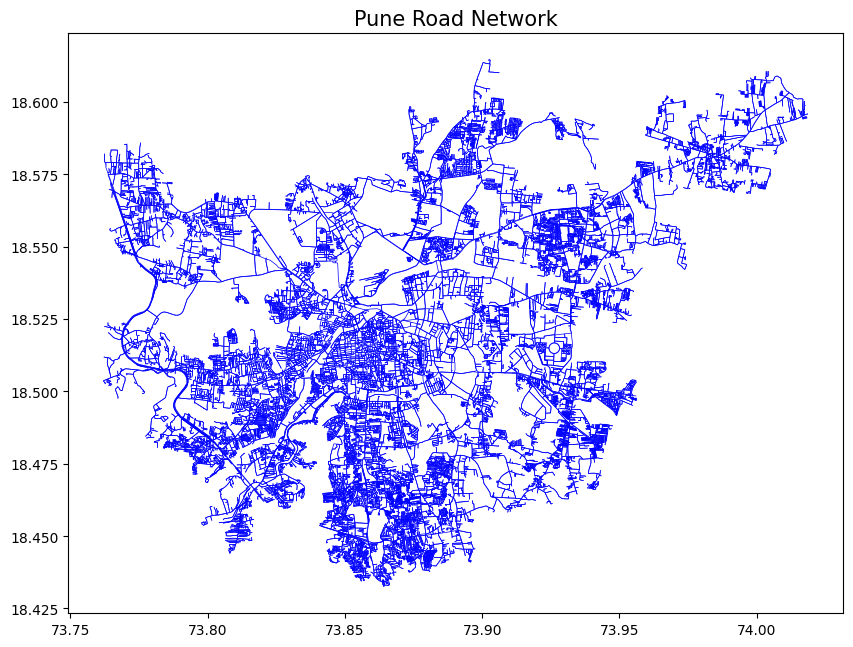

In [11]:
import matplotlib.pyplot as plt

# Plot the roads
fig, ax = plt.subplots(figsize=(10, 10))
gdf_edges.plot(ax=ax, linewidth=0.5, color="blue")
plt.title("Pune Road Network", fontsize=15)
plt.show()
